# Use Fourier analysis to predict the tide

Data (Calliaqua, St Vincent and the Grenadines, hourly) downloaded from here:
    https://psmsl.org/cme/downloaddata.php

Use first half of data to do Fourier analysis.
Use the remaining data as validation

F =  [0j, 0j] , F[0].real =  0.0 , F[0].imag =  0.0
fourier_integral =  (0.7648421872844883-0.6442176872376913j)


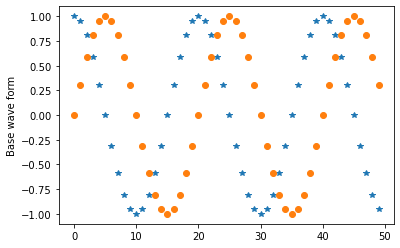

F[0] =  (0.7648421872844883-0.6442176872376913j)


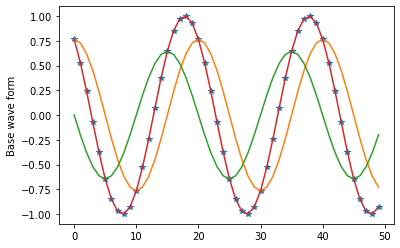

In [92]:
import pandas as pd
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

%precision 2

def load_tide_data(f):
    # use Pandas to read data and then convert to a numpy array
    d = pd.read_csv(f).to_numpy()
    return d

def fourier_coeff(w, d):
    d = d.flatten()
    T = np.array(list(range(0, d.shape[0])))
    e = np.exp(np.multiply(T, 1j*w*2*math.pi))
    fourier_integral = sum(np.multiply(e, d)) / d.shape[0] * 2
    print("fourier_integral = ", fourier_integral)
    
    plt.plot(e.real, '*')
    plt.plot(e.imag, 'o')
    plt.ylabel('Base wave form')
    plt.show()
    
    # return fourier_integral.real, fourier_integral.imag
    return fourier_integral

def main():
    d = load_tide_data('calq_rad_processed.csv')
    d_mean = np.mean(d)
    d = d - d_mean
    
    N = d.shape[0]
    N_train = math.ceil(N/2) # Training data index
    d_train = d[0:50]
    T = np.array(list(range(0, d_train.shape[0])))
    w = [1/20, 1/10]
    d_train = np.cos(T*2*np.pi*w[0] + 0.7)
    F = [0j, 0j]
    print("F = ", F, ", F[0].real = ", F[0].real, ", F[0].imag = ", F[0].imag)
    F[0] = fourier_coeff(w[0], d_train)
    print("F[0] = ", F[0])
    d_predict_cos = F[0].real * np.cos(T*w[0]*2*np.pi)
    d_predict_sin = F[0].imag * np.sin(T*w[0]*2*np.pi)
    # print(d_train)
    
    plt.plot(d_train, '*')
    plt.plot(d_predict_cos)
    plt.plot(d_predict_sin)
    plt.plot(d_predict_cos + d_predict_sin)
    plt.ylabel('Base wave form')
    plt.show()

if __name__ == "__main__":
    main()

